# Explorin Assylum Seeking data

Data found in The UN Refugee Agency [https://popstats.unhcr.org/refugee-statistics/download/]

In [2]:
import pandas as pd

## Moving in South Sudan

In [2]:
moving_in = pd.read_csv("data/moving_in.csv", on_bad_lines='skip')

# Removing Internal Displacements
moving_in = moving_in.drop(moving_in[moving_in["Country of origin (ISO)"] == "SSD"].index)

# Dropping redundant columns
moving_in = moving_in.drop(["Country of asylum (ISO)", "Country of asylum", "IDPs of concern to UNHCR", "Host Community", "Other people in need of international protection"], axis=1)

In [3]:
# Adding sum of all refugee like population
moving_in["Total"] = moving_in[["Refugees under UNHCR\'s mandate", "Asylum-seekers", "Stateless persons", "Others of concern"]].sum(axis=1)

In [4]:
moving_in

,Year,Country of origin,Country of origin (ISO),Refugees under UNHCR's mandate,Asylum-seekers,Stateless persons,Others of concern,Total
0,2011,Central African Rep.,CAF,1025,0,0,0,1025
1,2011,Dem. Rep. of the Congo,COD,22186,0,0,0,22186
2,2011,Ethiopia,ETH,4967,85,0,0,5052
4,2011,Sudan,SDN,76845,5,0,0,76850
5,2012,Central African Rep.,CAF,1560,5,0,0,1565
...,...,...,...,...,...,...,...,...
95,2022,Rwanda,RWA,0,0,0,31,31
96,2022,Somalia,SOM,0,25,0,5,30
98,2022,Stateless,XXA,0,0,10500,0,10500
99,2022,Sudan,SDN,290740,19,0,0,290759


### Most common countries to take refuge in South Sudan

In [5]:
moving_in["Country of origin"].value_counts()

Country of origin
Central African Rep.      12
Dem. Rep. of the Congo    12
Ethiopia                  12
Sudan                     12
Eritrea                   11
Somalia                    9
Burundi                    8
Cameroon                   4
Stateless                  3
Rwanda                     2
Congo                      1
Kenya                      1
Syrian Arab Rep.           1
Uganda                     1
Name: count, dtype: int64

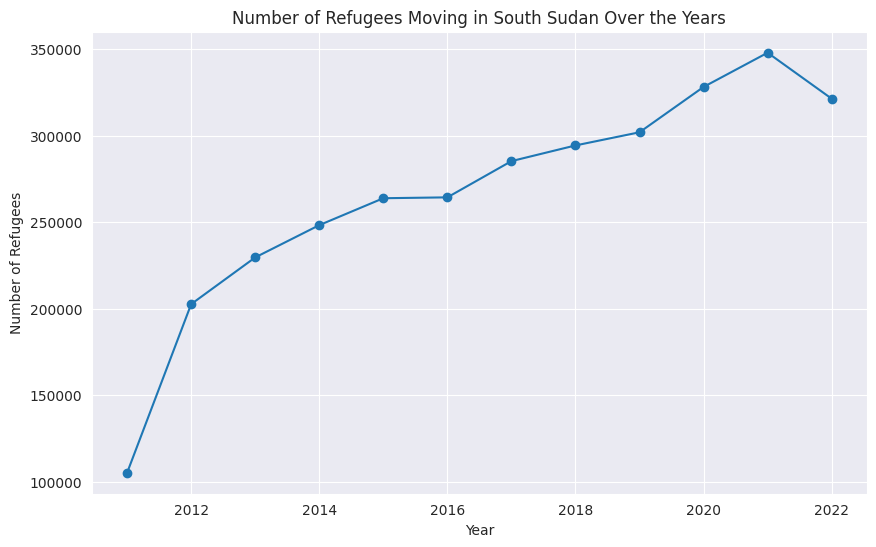

In [6]:
import matplotlib.pyplot as plt

# Group and sum the data by year
df_grouped = moving_in.groupby('Year')[['Refugees under UNHCR\'s mandate', 'Asylum-seekers', 'Stateless persons', 'Others of concern', 'Total']].sum().reset_index()

# Create a line chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(df_grouped['Year'], df_grouped['Total'], marker='o', linestyle='-')
plt.title('Number of Refugees Moving in South Sudan Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Refugees')
plt.grid(True)

# Show the plot
plt.show()

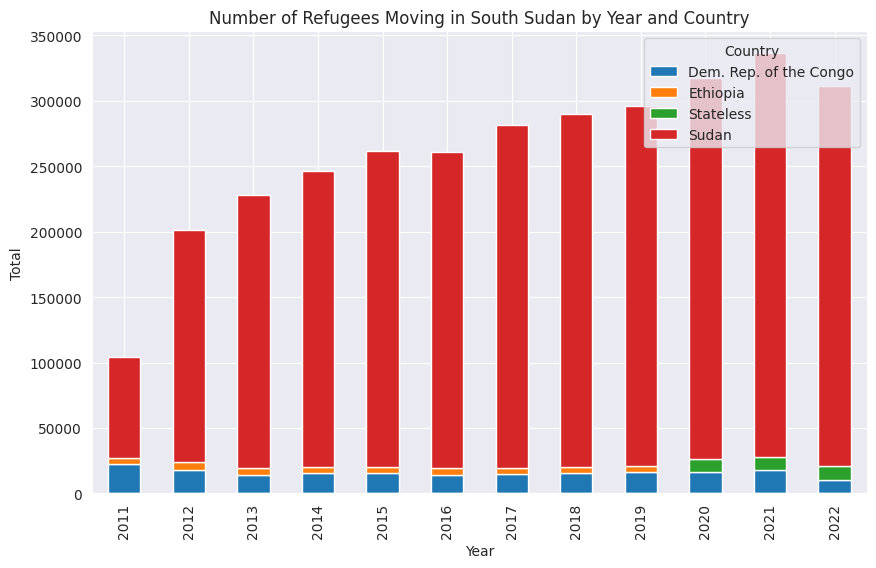

In [7]:
# Group and rank countries by year
moving_in['Rank'] = moving_in.groupby('Year')['Total'].rank(ascending=False)

# Filter for the top 3 countries
df_top3 = moving_in[moving_in['Rank'] <= 3]

# Pivot the data to create separate columns for each country
pivot_df = df_top3.pivot(index='Year', columns='Country of origin', values='Total')

# Create the bar chart
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Number of Refugees Moving in South Sudan by Year and Country')
plt.legend(title='Country', loc='upper right')
plt.show()

In [8]:
df_grouped

,Year,Refugees under UNHCR's mandate,Asylum-seekers,Stateless persons,Others of concern,Total
0,2011,105023,90,0,0,105113
1,2012,202581,32,0,0,202613
2,2013,229587,36,0,0,229623
3,2014,248152,128,0,0,248280
4,2015,263012,835,0,0,263847
5,2016,262558,1790,0,0,264348
6,2017,283405,1895,0,0,285300
7,2018,291838,2535,0,0,294373
8,2019,298309,3677,0,0,301986
9,2020,314438,3763,10000,0,328201


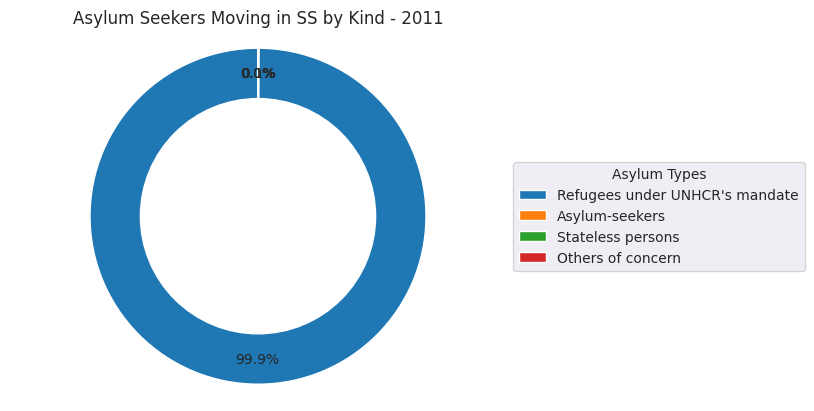

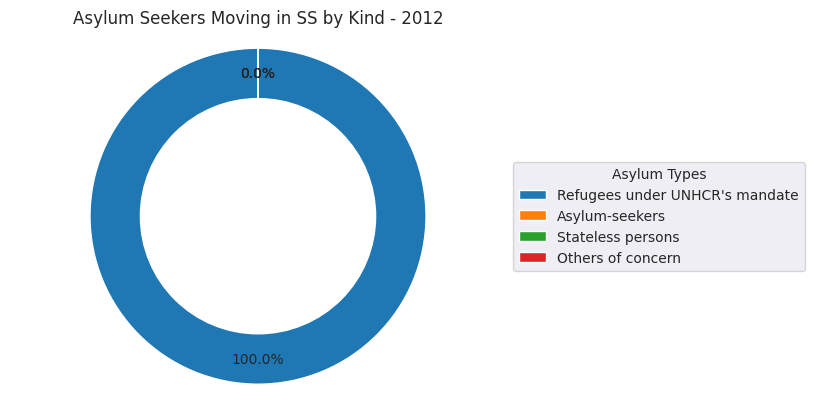

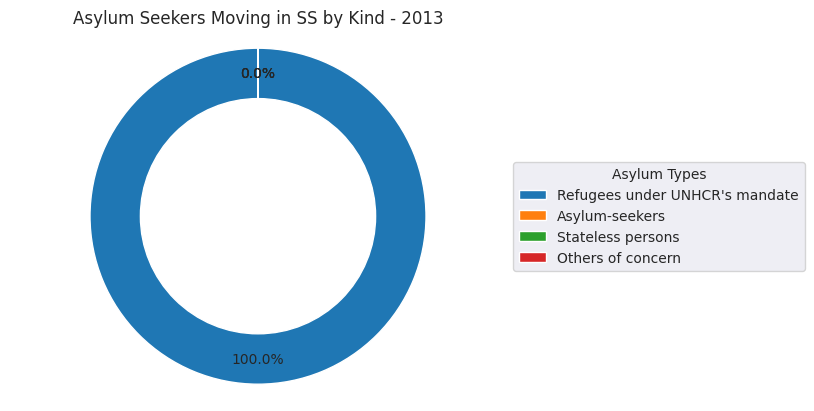

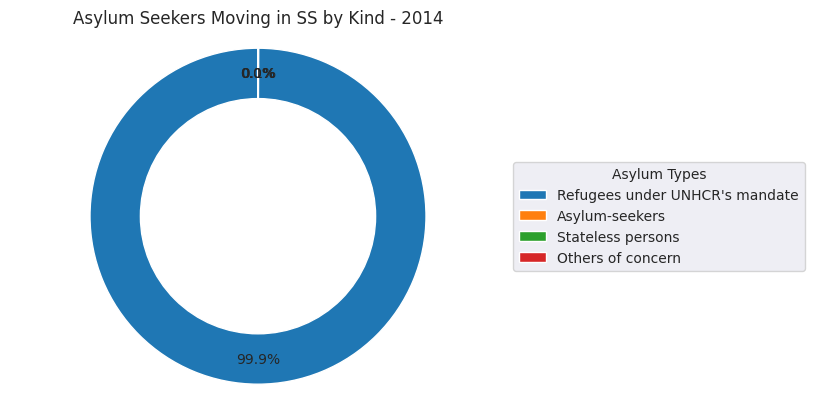

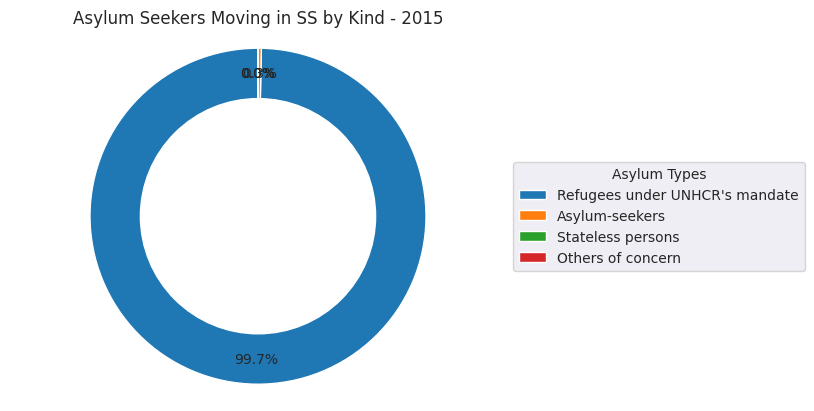

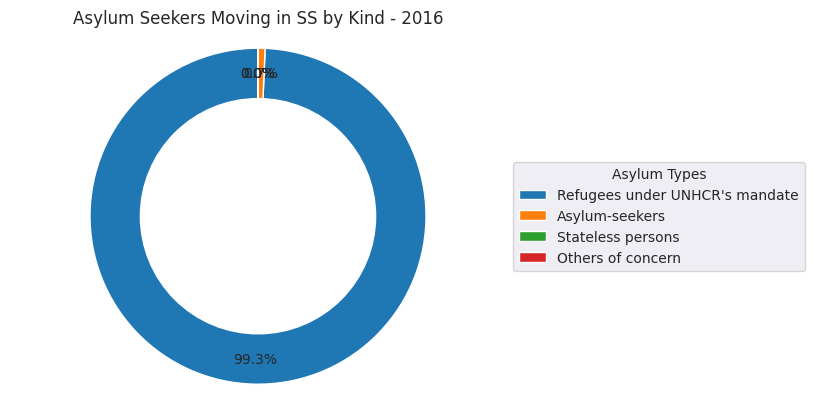

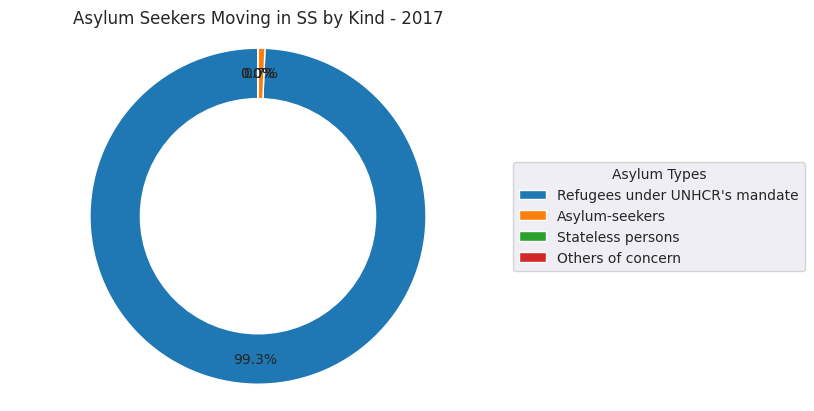

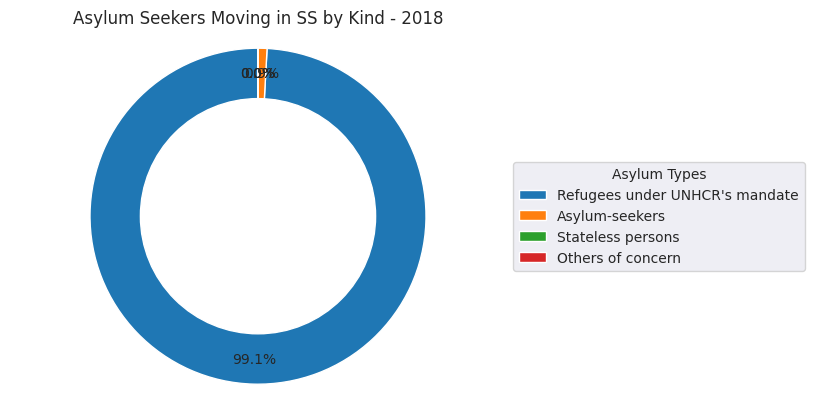

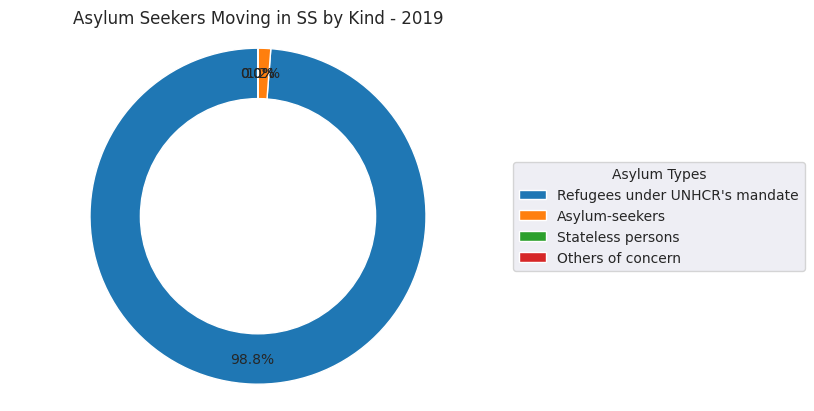

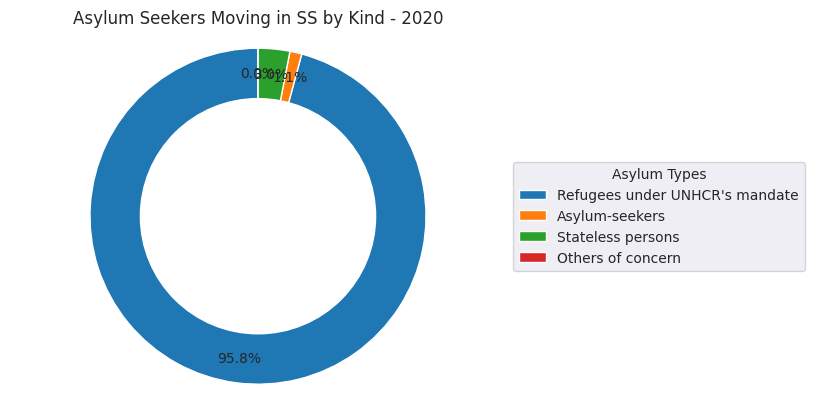

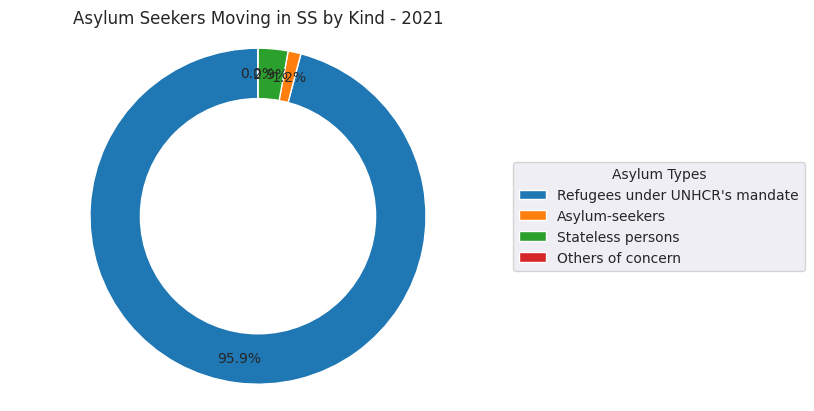

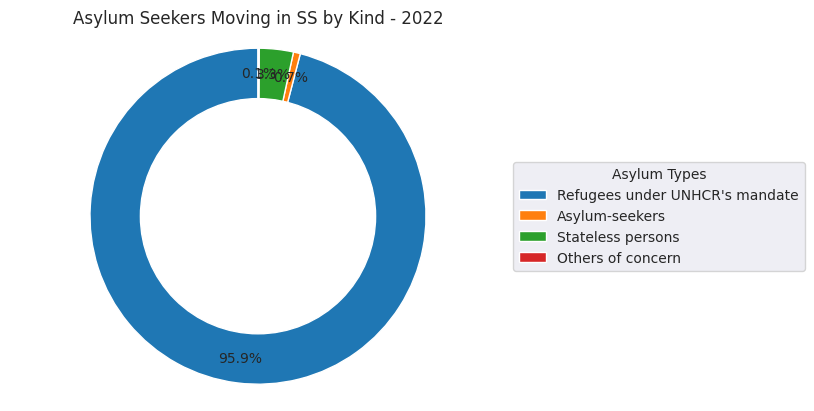

In [10]:
# Iterate through each year and create a donut chart
for year in df_grouped['Year']:
    year_data = df_grouped[df_grouped['Year'] == year].iloc[:, 1:-1]  # Exclude the "Total" column current year
    labels = year_data.columns
    sizes = year_data.values[0]

    # Create a donut chart
    fig, ax = plt.subplots()
    wedges, texts, autotexts = ax.pie(sizes, labels=None, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), pctdistance=0.85)

    # Create a legend with labels
    ax.legend(wedges, labels, title="Asylum Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    # Draw a circle in the center to make it a donut chart
    center_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig.gca().add_artist(center_circle)

    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(f'Asylum Seekers Moving in SS by Kind - {year}')
    plt.show()

## Moving out South Sudan

In [11]:
moving_out = pd.read_csv("data/moving_out.csv", on_bad_lines='skip')

# Removing Internal displacements
moving_out = moving_out.drop(moving_out[moving_out["Country of asylum (ISO)"] == "SSD"].index)

# Dropping redundant columns
moving_out = moving_out.drop(["Country of origin (ISO)", "Country of origin", "IDPs of concern to UNHCR", "Host Community", "Other people in need of international protection"], axis=1)

In [12]:
# Adding sum of all refugee like population
moving_out["Total"] = moving_out[["Refugees under UNHCR\'s mandate", "Asylum-seekers", "Stateless persons", "Others of concern"]].sum(axis=1)

In [13]:
moving_out

,Year,Country of asylum,Country of asylum (ISO),Refugees under UNHCR's mandate,Asylum-seekers,Stateless persons,Others of concern,Total
0,2011,Germany,DEU,0,5,0,0,5
2,2012,Egypt,EGY,178,764,0,0,942
3,2012,Eritrea,ERI,25,0,0,0,25
4,2012,Ethiopia,ETH,58715,21,0,0,58736
5,2012,Germany,DEU,6,20,0,0,26
...,...,...,...,...,...,...,...,...
425,2022,Tunisia,TUN,6,13,0,0,19
426,2022,Uganda,UGA,854242,28,0,0,854270
427,2022,United States of America,USA,56,87,0,0,143
428,2022,Zambia,ZMB,5,0,0,0,5


In [14]:
moving_out["Country of asylum"].value_counts()

Country of asylum
Germany                     12
Kenya                       11
United States of America    11
Uganda                      11
Syrian Arab Rep.            11
                            ..
Burundi                      1
Cote d'Ivoire                1
Russian Federation           1
Hungary                      1
Lithuania                    1
Name: count, Length: 66, dtype: int64

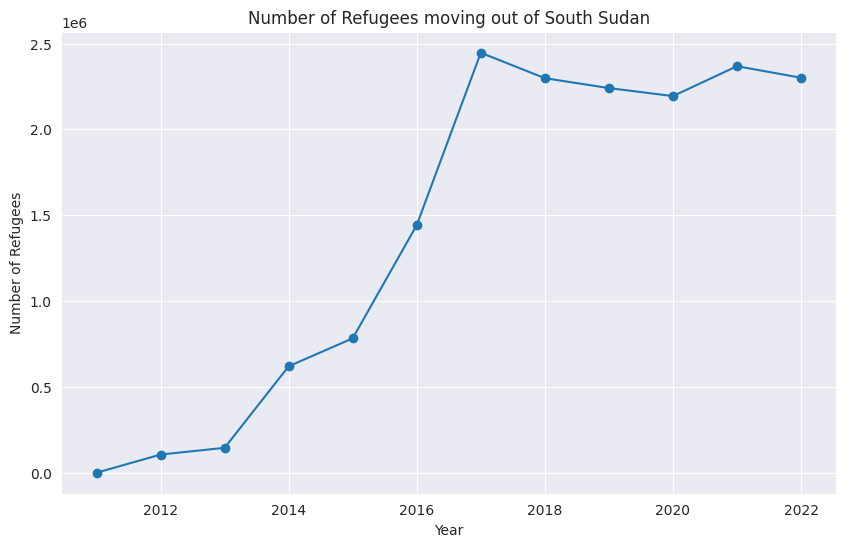

In [15]:
# Group and sum the data by year
df_grouped = moving_out.groupby('Year')[['Refugees under UNHCR\'s mandate', 'Asylum-seekers', 'Stateless persons', 'Others of concern', 'Total']].sum().reset_index()

# Create a line chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(df_grouped['Year'], df_grouped['Total'], marker='o', linestyle='-')
plt.title('Number of Refugees moving out of South Sudan')
plt.xlabel('Year')
plt.ylabel('Number of Refugees')
plt.grid(True)

# Show the plot
plt.show()

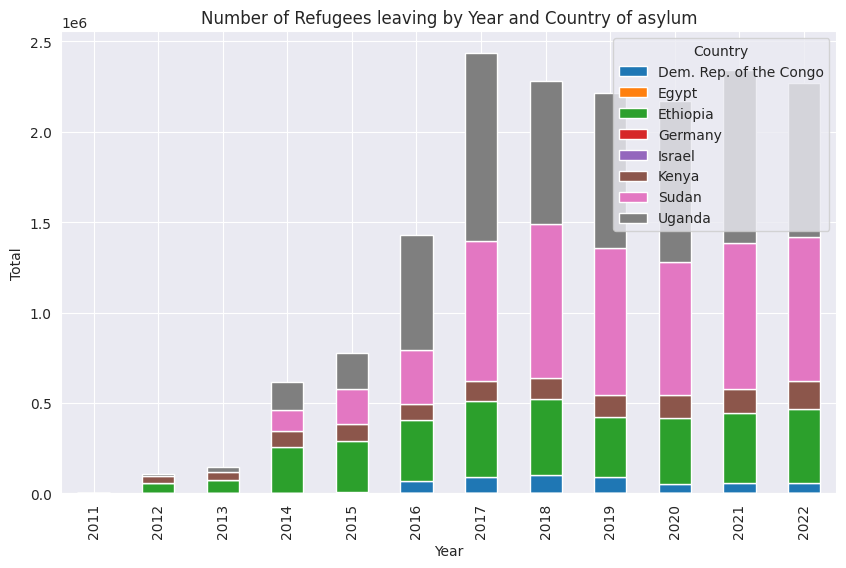

In [16]:
# Group and rank countries by year
moving_out['Rank'] = moving_out.groupby('Year')['Total'].rank(ascending=False)

# Filter for the top 3 countries
df_top3 = moving_out[moving_out['Rank'] <= 5]

# Pivot the data to create separate columns for each country
pivot_df = df_top3.pivot(index='Year', columns='Country of asylum', values='Total')

# Create the bar chart
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Number of Refugees leaving by Year and Country of asylum')
plt.legend(title='Country', loc='upper right')
plt.show()

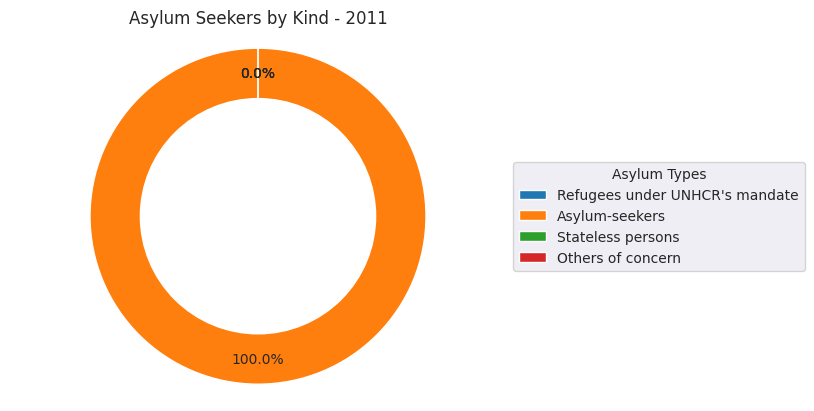

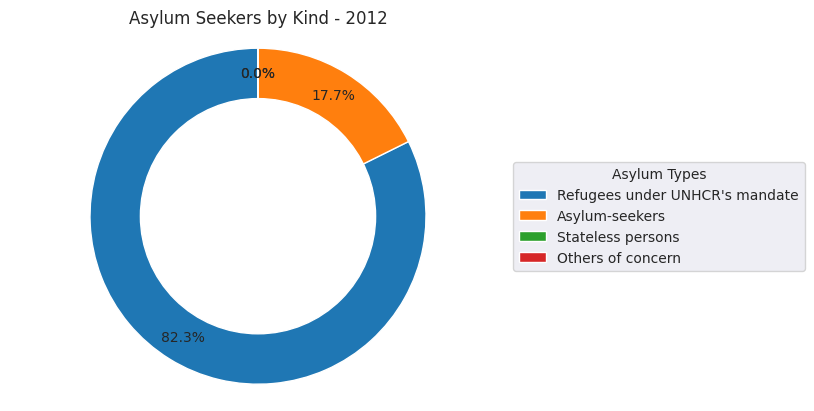

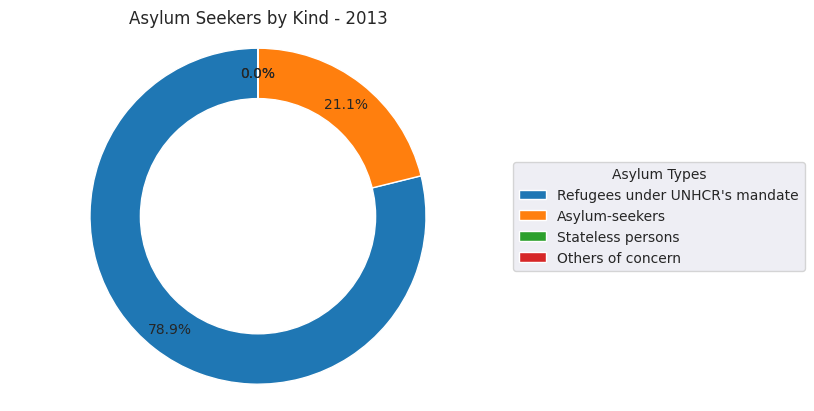

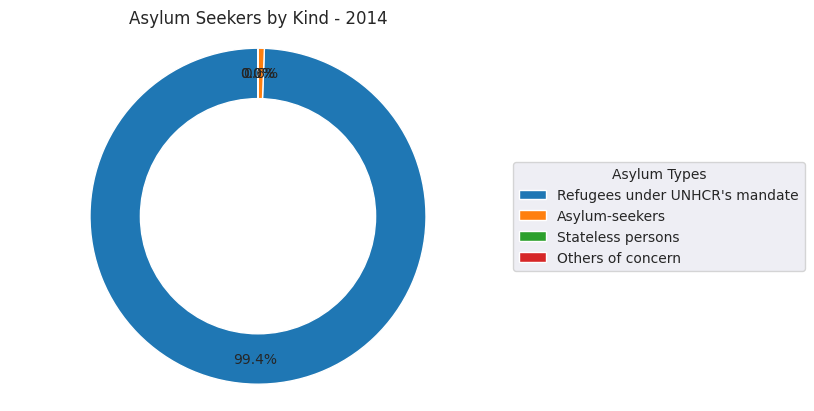

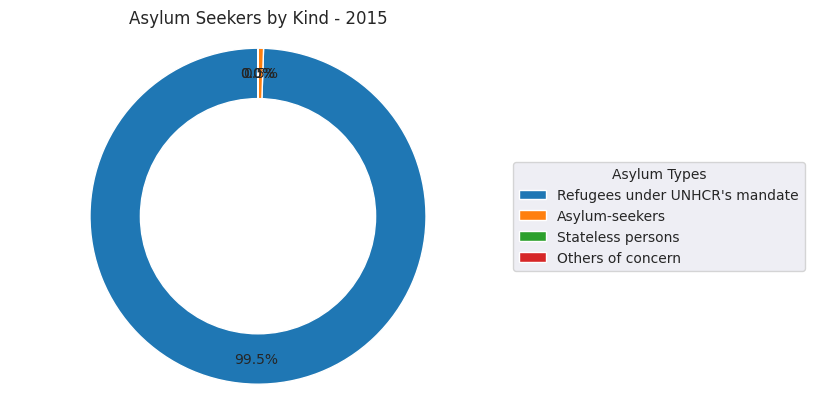

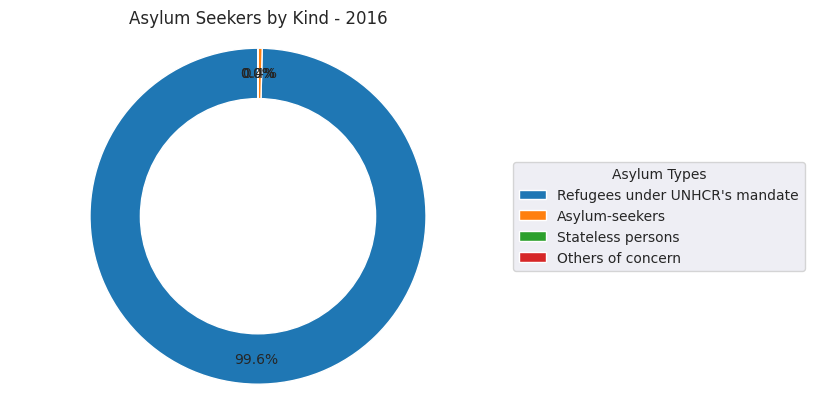

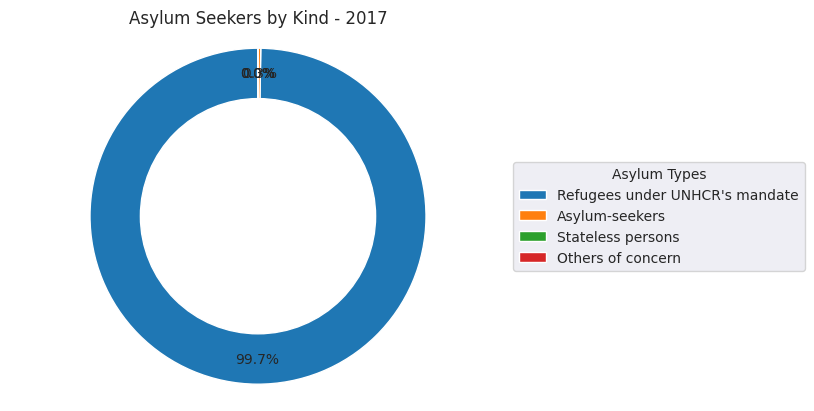

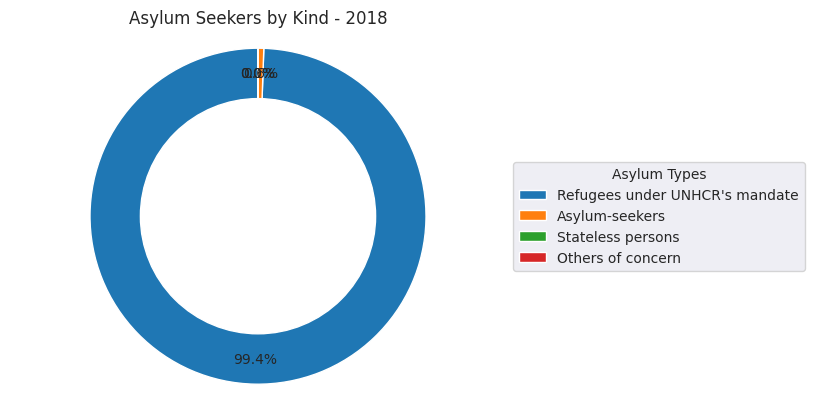

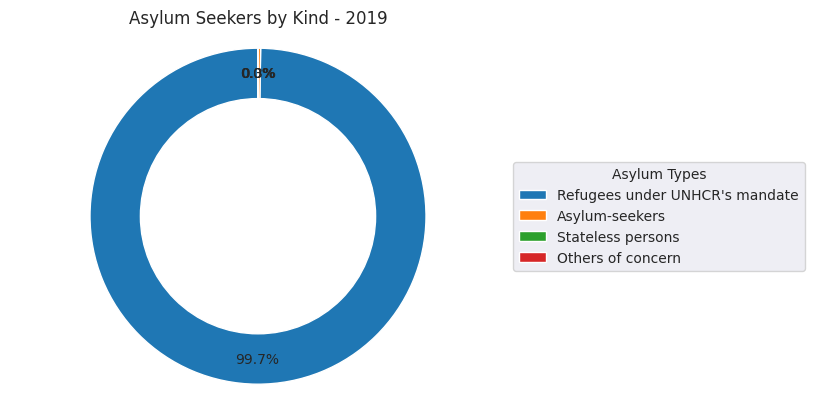

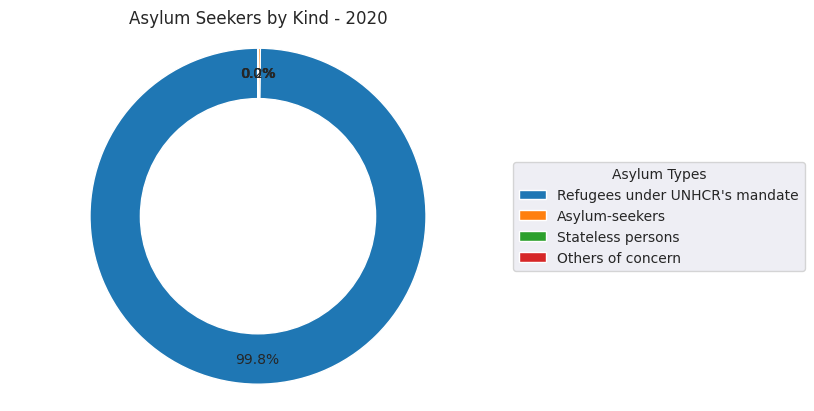

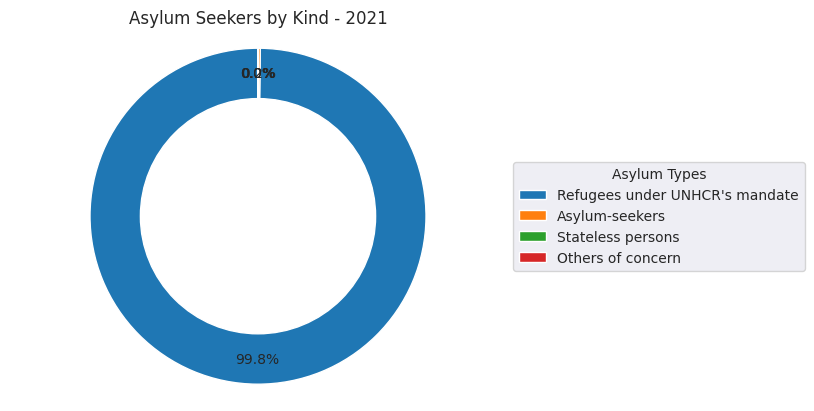

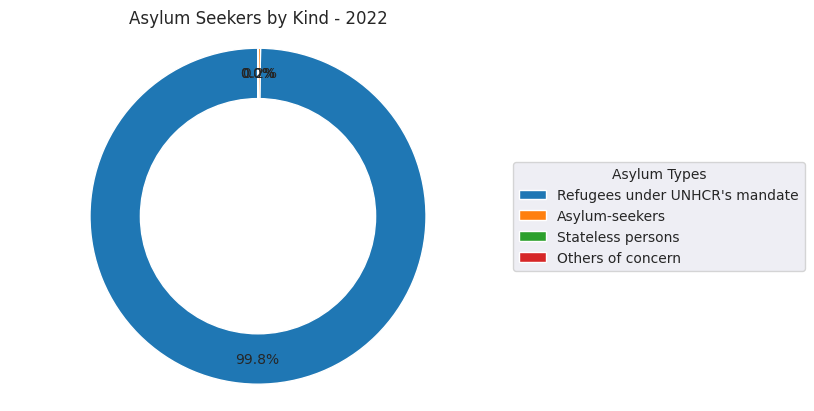

In [123]:
# Iterate through each year and create a donut chart
for year in df_grouped['Year']:
    year_data = df_grouped[df_grouped['Year'] == year].iloc[:, 1:-1]  # Exclude the "Total" column current year
    labels = year_data.columns
    sizes = year_data.values[0]

    # Create a donut chart
    fig, ax = plt.subplots()
    wedges, texts, autotexts = ax.pie(sizes, labels=None, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), pctdistance=0.85)

    # Create a legend with labels
    ax.legend(wedges, labels, title="Asylum Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    # Draw a circle in the center to make it a donut chart
    center_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig.gca().add_artist(center_circle)

    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(f'Asylum Seekers by Kind - {year}')
    plt.show()

## Internally displaced population (IDP)

In [17]:
# Run if you don't already have the internal_move.csv

# moving_out = pd.read_csv("data/moving_out.csv", on_bad_lines='skip')
# idp_df = moving_out[moving_out["Country of asylum (ISO)"] == "SSD"]
# idp_df.to_csv("data/internal_move.csv", index = False)

In [18]:
internal_df = pd.read_csv("data/internal_move.csv")

# Dropping redundant columns
internal_df = internal_df.drop(["Country of origin (ISO)", "Country of origin", "Country of asylum (ISO)", "Country of asylum", "Host Community", "Other people in need of international protection", "Refugees under UNHCR's mandate", "Asylum-seekers", "Stateless persons"], axis=1)

# Adding sum of all refugee like population
internal_df["Total"] = internal_df[["IDPs of concern to UNHCR", "Others of concern"]].sum(axis=1)

In [19]:
internal_df

,Year,IDPs of concern to UNHCR,Others of concern,Total
0,2011,560161,0,560161
1,2012,345670,0,345670
2,2013,331097,0,331097
3,2014,1645392,0,1645392
4,2015,1790427,0,1790427
5,2016,1853924,0,1853924
6,2017,1903953,10000,1913953
7,2018,1878154,10000,1888154
8,2019,1665815,10000,1675815
9,2020,1600254,0,1600254


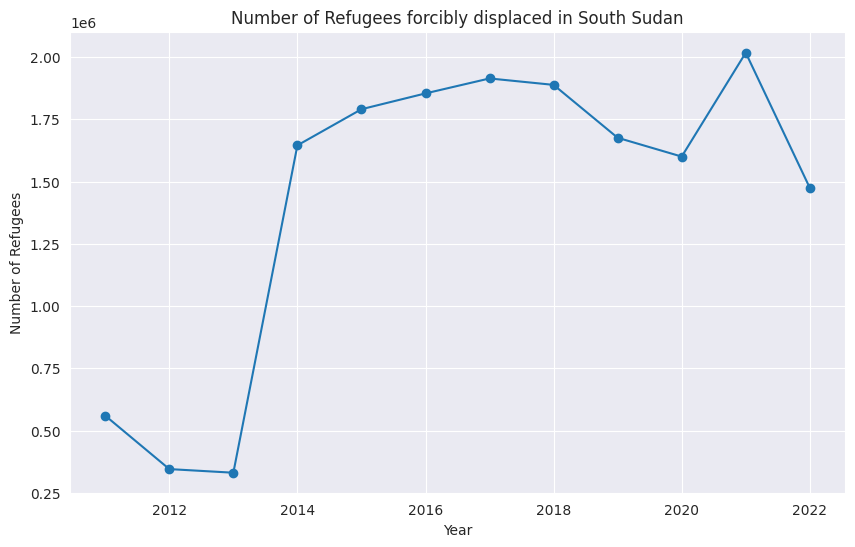

In [20]:
# Create a line chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(internal_df['Year'], internal_df['Total'], marker='o', linestyle='-')
plt.title('Number of Refugees forcibly displaced in South Sudan')
plt.xlabel('Year')
plt.ylabel('Number of Refugees')
plt.grid(True)

# Show the plot
plt.show()

# New data source for Internal Displacements

Data is collected in rounds and is collected every 6 months. Some rounds are missing

In [21]:
# round_2 = pd.read_excel("internal_movements/round_2.xlsx")
# round_4 = pd.read_excel("internal_movements/round_4.xlsx")
# round_5 = pd.read_excel("internal_movements/round_5.xlsx")
# round_6 = pd.read_excel("internal_movements/round_6.xlsx")
# round_7 = pd.read_excel("internal_movements/round_7.xlsx")
# round_8 = pd.read_excel("internal_movements/round_8.xlsx")
# round_9 = pd.read_excel("internal_movements/round_9.xlsx")
# round_10 = pd.read_excel("internal_movements/round_10.xlsx")
# round_11 = pd.read_excel("internal_movements/round_11.xlsx")
# round_12 = pd.read_excel("internal_movements/round_12.xlsx")
# round_13 = pd.read_excel("internal_movements/round_13.xlsx")
# round_14 = pd.read_excel("internal_movements/round_14.xlsx")

In [8]:
asylum = pd.read_csv("data/2015_2023_asylum.csv")
asylum

,state_name,region,year,idp,returnee,total
0,Central Equatoria,Equatoria,2015.0,26613.0,21232.0,47845.0
1,Central Equatoria,Equatoria,2016.0,108780.0,1321.0,110101.0
2,Central Equatoria,Equatoria,2017.0,21686.0,39306.0,60992.0
3,Central Equatoria,Equatoria,2018.0,31057.0,37471.0,68528.0
4,Central Equatoria,Equatoria,2019.0,7513.0,6512.0,14025.0
...,...,...,...,...,...,...
91,NaN,NaN,NaN,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,NaN,NaN
93,NaN,NaN,NaN,NaN,NaN,NaN
94,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Group by the 'region' column and sum the numeric columns
asylum = asylum.groupby(['region', 'year']).agg({
    'idp': 'sum', 'returnee': 'sum', 'total': 'sum'
}).reset_index()

In [10]:
asylum

,region,year,idp,returnee,total
0,Bahr El Ghazal,2015.0,105674.0,24223.0,129897.0
1,Bahr El Ghazal,2016.0,72681.0,34667.0,107348.0
2,Bahr El Ghazal,2017.0,151594.0,72410.0,224004.0
3,Bahr El Ghazal,2018.0,122461.0,74854.0,197315.0
4,Bahr El Ghazal,2019.0,19049.0,52751.0,71800.0
5,Bahr El Ghazal,2021.0,48822.0,109028.0,157850.0
6,Bahr El Ghazal,2022.0,43068.0,55038.0,98106.0
7,Bahr El Ghazal,2023.0,56531.0,148478.0,205009.0
8,Bahr el Ghazal,2022.0,70539.0,177249.0,247788.0
9,Equatoria,2015.0,57041.0,28345.0,85386.0


In [11]:
ipc = pd.read_csv("data/weighted_pop_ipc_region.csv")
ipc_test = ipc

# Filter for the years 2015 to 2020
years_to_include = list(range(2015, 2020))
ipc_test = ipc_test[ipc_test['year'].isin(years_to_include)]

# List of numeric columns
numeric_columns = [col for col in ipc_test.columns if pd.api.types.is_numeric_dtype(ipc_test[col])]

# Columns to remove
to_remove = ["year", "district_code", "centx", "centy", "year_month", "month", "area"]

# Remove specified columns from numeric_columns
numeric_columns = [col for col in numeric_columns if col not in to_remove]

result = ipc_test.groupby(['administrative_region', 'year'])[numeric_columns].median().reset_index()

result = result.rename(columns = {"administrative_region": "region"})

result

,region,year,ipc,ha,ndvi_mean,ndvi_anom,rain_mean,rain_anom,et_mean,et_anom,...,sum_fatalities,food_price_idx,cropland_pct,pop,ruggedness_mean,pasture_pct,total_region_pop,normalized_population,weighted_ipc_pop,generalized_ipc_pop
0,Bahr El Ghazal,2015,2.000000,0.0,0.533262,102.298100,11.255570,0.001242,7.978935,0.345179,...,0.0,3.195712,5.652349,134327.0,12277.17,89.615385,3079776.0,0.043616,0.088099,2.077271
1,Bahr El Ghazal,2016,2.124918,0.0,0.479563,99.436915,12.177215,0.000194,6.633816,0.003251,...,0.0,9.020146,5.652349,138579.0,12277.17,89.615385,3451016.0,0.040156,0.094875,2.302194
2,Bahr El Ghazal,2017,3.000000,0.0,0.532950,102.746800,10.773585,-0.005376,9.871009,0.662243,...,0.0,31.846695,5.652349,140126.5,12277.17,89.615385,3822256.0,0.036661,0.107067,2.883539
3,Bahr El Ghazal,2018,3.000000,0.0,0.515564,102.297100,11.582235,0.092852,9.292008,0.364347,...,0.0,47.804755,5.652349,140444.5,12277.17,89.615385,4193492.0,0.033491,0.098156,2.875405
4,Bahr El Ghazal,2019,3.000000,0.0,0.532698,102.901700,10.191832,0.012569,11.174780,0.926480,...,0.0,69.868195,5.652349,142685.0,12277.17,89.615385,4564735.0,0.031258,0.090598,3.098994
5,Equatoria,2015,1.000000,0.0,0.626416,101.627950,16.445165,-0.250135,20.023580,2.032780,...,0.0,3.084741,23.006415,205091.5,60650.77,67.157215,5353149.0,0.038312,0.038312,1.426627
6,Equatoria,2016,2.000000,0.0,0.589367,101.536400,16.892845,-0.594359,17.566125,1.135026,...,0.0,8.476410,23.006415,208171.5,60650.77,67.157215,5123228.0,0.040633,0.081041,2.278553
7,Equatoria,2017,2.124918,0.0,0.629308,103.119900,16.312820,-0.417801,20.145720,1.731950,...,0.0,32.535205,23.006415,185953.5,60650.77,67.157215,4893307.0,0.038002,0.107669,2.708042
8,Equatoria,2018,3.000000,0.0,0.646001,101.436900,18.397255,0.632979,19.162075,0.840951,...,0.0,44.980175,23.006415,163061.0,60650.77,67.157215,4663386.0,0.034966,0.092198,2.597435
9,Equatoria,2019,3.000000,0.0,0.650010,103.207550,18.707140,0.722538,21.818470,1.948089,...,0.0,66.183600,23.006415,144363.5,60650.77,67.157215,4433463.0,0.032562,0.076127,2.607378


In [12]:
# Merge the two dataframes on 'year' and 'region'
merged_df = asylum.merge(result, on=["region", "year"])
merged_df

,region,year,idp,returnee,total,ipc,ha,ndvi_mean,ndvi_anom,rain_mean,...,sum_fatalities,food_price_idx,cropland_pct,pop,ruggedness_mean,pasture_pct,total_region_pop,normalized_population,weighted_ipc_pop,generalized_ipc_pop
0,Bahr El Ghazal,2015.0,105674.0,24223.0,129897.0,2.000000,0.0,0.533262,102.298100,11.255570,...,0.0,3.195712,5.652349,134327.0,12277.17,89.615385,3079776.0,0.043616,0.088099,2.077271
1,Bahr El Ghazal,2016.0,72681.0,34667.0,107348.0,2.124918,0.0,0.479563,99.436915,12.177215,...,0.0,9.020146,5.652349,138579.0,12277.17,89.615385,3451016.0,0.040156,0.094875,2.302194
2,Bahr El Ghazal,2017.0,151594.0,72410.0,224004.0,3.000000,0.0,0.532950,102.746800,10.773585,...,0.0,31.846695,5.652349,140126.5,12277.17,89.615385,3822256.0,0.036661,0.107067,2.883539
3,Bahr El Ghazal,2018.0,122461.0,74854.0,197315.0,3.000000,0.0,0.515564,102.297100,11.582235,...,0.0,47.804755,5.652349,140444.5,12277.17,89.615385,4193492.0,0.033491,0.098156,2.875405
4,Bahr El Ghazal,2019.0,19049.0,52751.0,71800.0,3.000000,0.0,0.532698,102.901700,10.191832,...,0.0,69.868195,5.652349,142685.0,12277.17,89.615385,4564735.0,0.031258,0.090598,3.098994
5,Equatoria,2015.0,57041.0,28345.0,85386.0,1.000000,0.0,0.626416,101.627950,16.445165,...,0.0,3.084741,23.006415,205091.5,60650.77,67.157215,5353149.0,0.038312,0.038312,1.426627
6,Equatoria,2016.0,169396.0,9489.0,178885.0,2.000000,0.0,0.589367,101.536400,16.892845,...,0.0,8.476410,23.006415,208171.5,60650.77,67.157215,5123228.0,0.040633,0.081041,2.278553
7,Equatoria,2017.0,59393.0,118798.0,178191.0,2.124918,0.0,0.629308,103.119900,16.312820,...,0.0,32.535205,23.006415,185953.5,60650.77,67.157215,4893307.0,0.038002,0.107669,2.708042
8,Equatoria,2018.0,62411.0,129297.0,191708.0,3.000000,0.0,0.646001,101.436900,18.397255,...,0.0,44.980175,23.006415,163061.0,60650.77,67.157215,4663386.0,0.034966,0.092198,2.597435
9,Equatoria,2019.0,21803.0,34100.0,55903.0,3.000000,0.0,0.650010,103.207550,18.707140,...,0.0,66.183600,23.006415,144363.5,60650.77,67.157215,4433463.0,0.032562,0.076127,2.607378


In [13]:
# Group the dataframe by region
grouped_df = merged_df.groupby('region')

# Calculate the correlation matrix for each group
correlation_df = grouped_df.apply(lambda group: group.select_dtypes(include='number').corr())

In [16]:
grouped_df.head(20)

,region,year,idp,returnee,total,ipc,ha,ndvi_mean,ndvi_anom,rain_mean,...,sum_fatalities,food_price_idx,cropland_pct,pop,ruggedness_mean,pasture_pct,total_region_pop,normalized_population,weighted_ipc_pop,generalized_ipc_pop
0,Bahr El Ghazal,2015.0,105674.0,24223.0,129897.0,2.000000,0.0,0.533262,102.298100,11.255570,...,0.0,3.195712,5.652349,134327.0,12277.17,89.615385,3079776.0,0.043616,0.088099,2.077271
1,Bahr El Ghazal,2016.0,72681.0,34667.0,107348.0,2.124918,0.0,0.479563,99.436915,12.177215,...,0.0,9.020146,5.652349,138579.0,12277.17,89.615385,3451016.0,0.040156,0.094875,2.302194
2,Bahr El Ghazal,2017.0,151594.0,72410.0,224004.0,3.000000,0.0,0.532950,102.746800,10.773585,...,0.0,31.846695,5.652349,140126.5,12277.17,89.615385,3822256.0,0.036661,0.107067,2.883539
3,Bahr El Ghazal,2018.0,122461.0,74854.0,197315.0,3.000000,0.0,0.515564,102.297100,11.582235,...,0.0,47.804755,5.652349,140444.5,12277.17,89.615385,4193492.0,0.033491,0.098156,2.875405
4,Bahr El Ghazal,2019.0,19049.0,52751.0,71800.0,3.000000,0.0,0.532698,102.901700,10.191832,...,0.0,69.868195,5.652349,142685.0,12277.17,89.615385,4564735.0,0.031258,0.090598,3.098994
5,Equatoria,2015.0,57041.0,28345.0,85386.0,1.000000,0.0,0.626416,101.627950,16.445165,...,0.0,3.084741,23.006415,205091.5,60650.77,67.157215,5353149.0,0.038312,0.038312,1.426627
6,Equatoria,2016.0,169396.0,9489.0,178885.0,2.000000,0.0,0.589367,101.536400,16.892845,...,0.0,8.476410,23.006415,208171.5,60650.77,67.157215,5123228.0,0.040633,0.081041,2.278553
7,Equatoria,2017.0,59393.0,118798.0,178191.0,2.124918,0.0,0.629308,103.119900,16.312820,...,0.0,32.535205,23.006415,185953.5,60650.77,67.157215,4893307.0,0.038002,0.107669,2.708042
8,Equatoria,2018.0,62411.0,129297.0,191708.0,3.000000,0.0,0.646001,101.436900,18.397255,...,0.0,44.980175,23.006415,163061.0,60650.77,67.157215,4663386.0,0.034966,0.092198,2.597435
9,Equatoria,2019.0,21803.0,34100.0,55903.0,3.000000,0.0,0.650010,103.207550,18.707140,...,0.0,66.183600,23.006415,144363.5,60650.77,67.157215,4433463.0,0.032562,0.076127,2.607378


In [15]:
correlation_df

year       idp  returnee  \
region                                                                   
Bahr El Ghazal     year                   1.000000 -0.384064  0.685696   
                   idp                   -0.384064  1.000000  0.398150   
                   returnee               0.685696  0.398150  1.000000   
                   total                 -0.065615  0.945554  0.675027   
                   ipc                    0.882001  0.071846  0.920089   
...                                            ...       ...       ...   
Greater Upper Nile pasture_pct                 NaN       NaN       NaN   
                   total_region_pop       1.000000 -0.879042  0.045336   
                   normalized_population -0.824155  0.906690  0.447179   
                   weighted_ipc_pop      -0.398495  0.571191  0.385162   
                   generalized_ipc_pop    0.943660 -0.684498  0.351196   

                                             total       ipc        ha  \
region                                                                   
Bahr El Ghazal     year                  -0.065615  0.882001       NaN   
                   idp                    0.945554  0.071846       NaN   
                   returnee               0.675027  0.920089       NaN   
                   total                  1.000000  0.384231       NaN   
                   ipc                    0.384231  1.000000       NaN   
...                                            ...       ...       ...   
Greater Upper Nile pasture_pct                 NaN       NaN       NaN   
                   total_region_pop      -0.663518  0.353551  0.353550   
                   normalized_population  0.878305 -0.387387 -0.191700   
                   weighted_ipc_pop       0.593923 -0.010148  0.603331   
                   generalized_ipc_pop   -0.392654  0.424668  0.429811   

                                          ndvi_mean  ndvi_anom  rain_mean  \
region                                                                      
Bahr El Ghazal     year                    0.237701   0.452018  -0.567388   
                   idp                     0.145546   0.145532   0.270360   
                   returnee                0.242082   0.460659  -0.282314   
                   total                   0.202952   0.280491   0.117283   
                   ipc                     0.415846   0.622201  -0.586954   
...                                             ...        ...        ...   
Greater Upper Nile pasture_pct                  NaN        NaN        NaN   
                   total_region_pop        0.338354   0.169845   0.590562   
                   normalized_population  -0.540784  -0.360213  -0.624984   
                   weighted_ipc_pop       -0.882623  -0.069065  -0.375038   
                   generalized_ipc_pop     0.197502   0.184865   0.381599   

                                          rain_anom  ...  sum_fatalities  \
region                                               ...                   
Bahr El Ghazal     year                    0.443827  ...             NaN   
                   idp                     0.164227  ...             NaN   
                   returnee                0.544463  ...             NaN   
                   total                   0.325261  ...             NaN   
                   ipc                     0.432689  ...             NaN   
...                                             ...  ...             ...   
Greater Upper Nile pasture_pct                  NaN  ...             NaN   
                   total_region_pop        0.670086  ...             NaN   
                   normalized_population  -0.894235  ...             NaN   
                   weighted_ipc_pop       -0.915456  ...             NaN   
                   generalized_ipc_pop     0.438805  ...             NaN   

                                          food_price_idx  cropland_pct  \
region                                                 